# 09 데이터분석 프로젝트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# PC에 그림 설정
plt.rcParams.update({'figure.dpi' : 100})
plt.rcParams.update({'figure.figsize' : [4,2.5]})

# PC에 한글 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision' , 2)

#그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [8]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 1.8 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.4 MB 5.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.2/2.4 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  2.4/2.4 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 12.8 MB/s eta 0:00:00


In [9]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [13]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [15]:
welfare = raw_welfare.copy()

In [16]:
welfare.shape

(14418, 830)

In [18]:
welfare = welfare.rename(columns={'h14_g3' :'sex',
                                  'h14_g4': 'birth',
                                  'h14_g10': 'mariage_type',
                                  'h14_g11': 'religion',
                                  'p1402_8aql': 'income',
                                  'h14_eco9': 'code_job',
                                  'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [19]:
welfare.sex.dtypes

dtype('float64')

In [20]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [21]:
welfare.sex.isna().sum()

0

In [22]:
welfare['sex'] = np.where(welfare.sex == 2 , 'male' , 'female')
welfare['sex'].value_counts()

sex
male      7913
female    6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

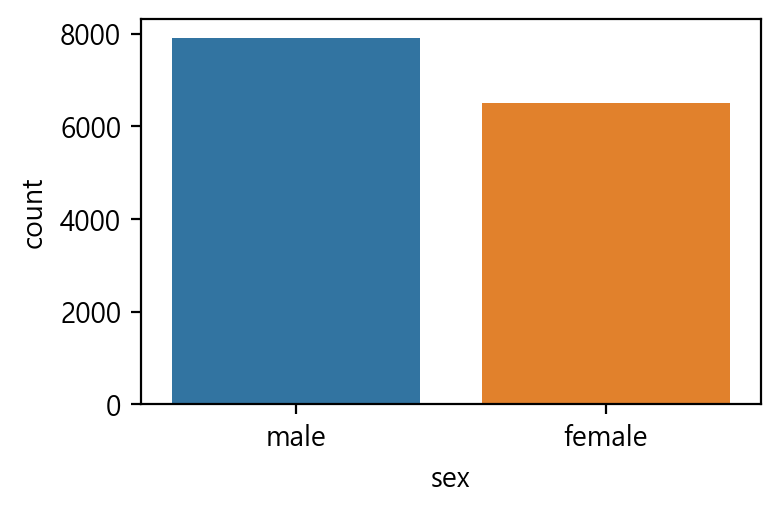

In [23]:
sns.countplot(welfare, x='sex' , hue='sex')